<a href="https://colab.research.google.com/github/BloodInfection/MMO2023/blob/main/%D0%A0%D0%9A1/rk1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv('/content/movies.csv')

In [ ]:
df.isna().mean()

Film                 0.0
Genre                0.0
Lead Studio          0.0
Audience score %     0.0
Profitability        0.0
Rotten Tomatoes %    0.0
Worldwide Gross      0.0
Year                 0.0
dtype: float64

**Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием преобразования Бокса-Кокса (Box-Cox transformation).**

<Axes: xlabel='Audience score %', ylabel='Count'>

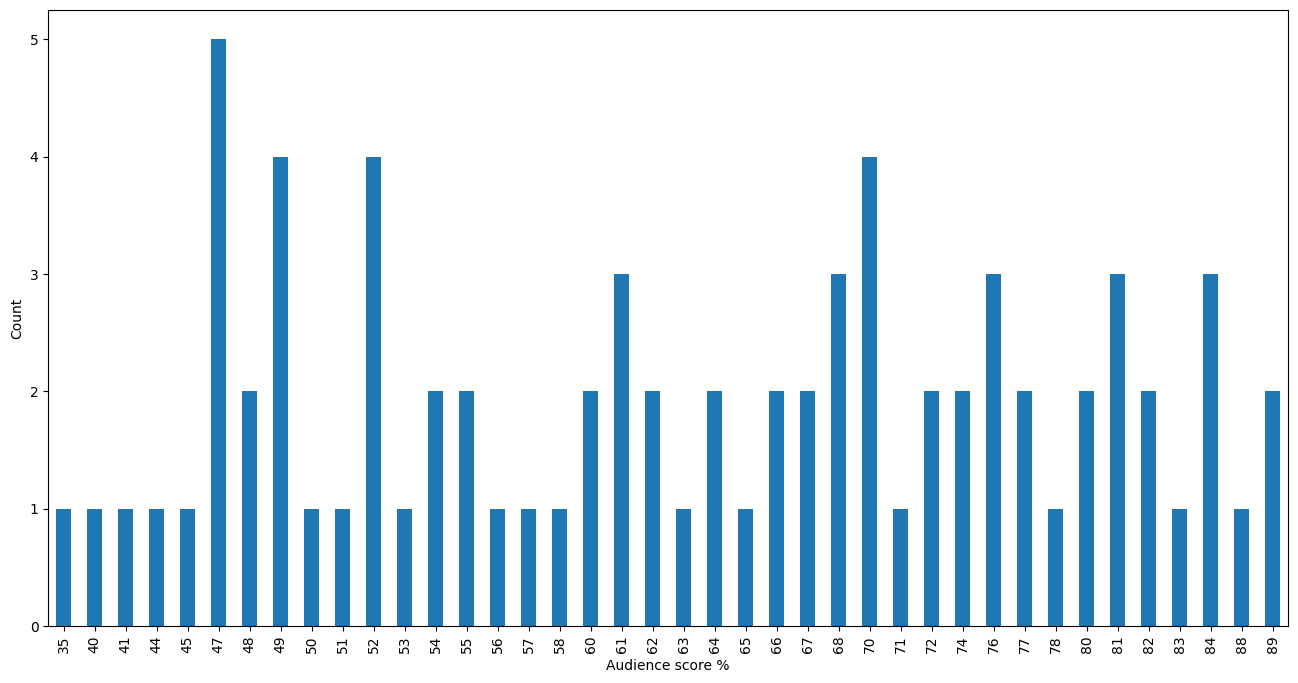

In [ ]:
df.groupby('Audience score %')['Year'].agg('count').plot(kind = 'bar',figsize=( 16 , 8 ), ylabel = 'Count')

In [ ]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    plt.figure(figsize=(20,10))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

Оптимальное значение λ = 0.6849714080298129


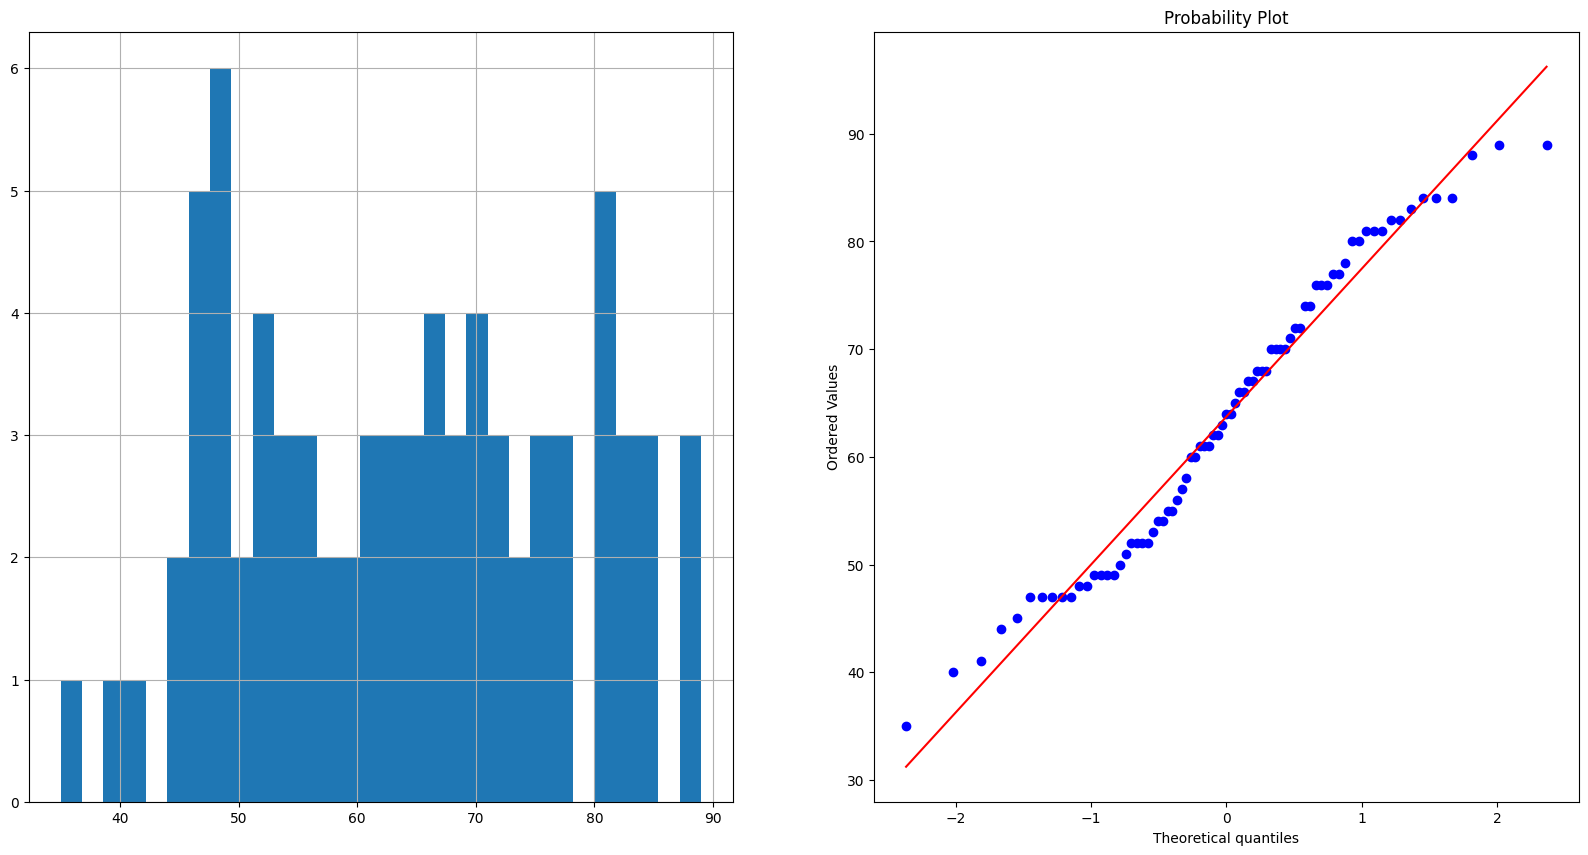

In [ ]:

df['Rating_boxcox'], param = stats.boxcox(df['Audience score %']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(df, 'Audience score %')


**Для набора данных проведите процедуру отбора признаков (feature selection). Используйте класс SelectKBest для 5 лучших признаков, и метод, основанный на взаимной информации.** 

In [ ]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
df2= pd.read_csv('/content/diabetes.csv')

In [ ]:
dfX=df2[['Pregnancies','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Glucose', 'Insulin', 'Age']]
dfY=df2[['Outcome']]
df3=df2.drop(columns= 'Outcome')
df2_feature_names= list(df3.columns)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Взаимная информация')

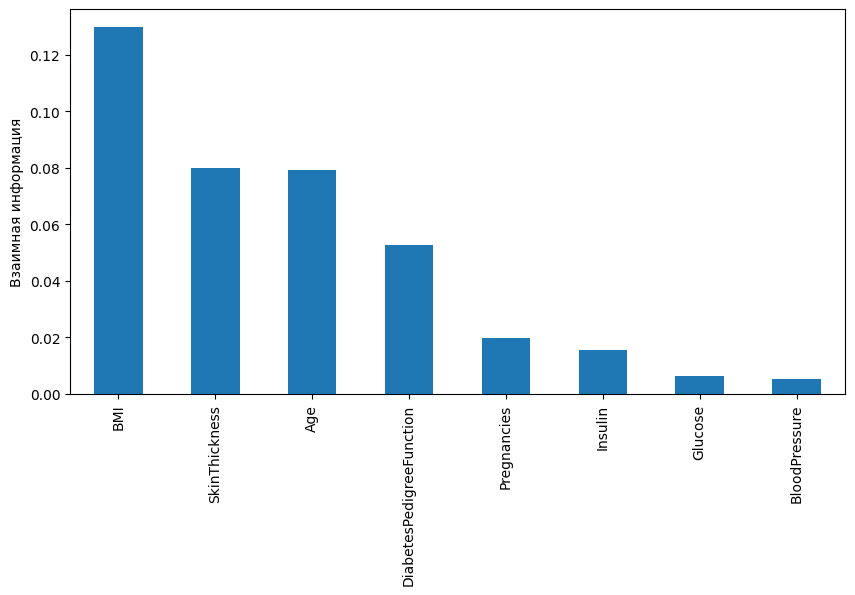

In [ ]:
mi = mutual_info_regression(dfX, dfY)
mi = pd.Series(mi)
mi.index = df2_feature_names
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [ ]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(dfX, dfY)
list(zip(df2, sel_mi.get_support()))
     

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[('Pregnancies', True),
 ('Glucose', False),
 ('BloodPressure', True),
 ('SkinThickness', True),
 ('Insulin', False),
 ('BMI', True),
 ('DiabetesPedigreeFunction', False),
 ('Age', True)]